In [1]:
from google import colab
colab.drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 목표
파이토치 MLP 활용한 데이터 분석  
데이터 : Dacon 잡케어 추천 알고리즘대최 -> 설문 형식의 데이터  
모두 명목형 변수(ex :취향과 속성)이지만 순서가 의미가 있는 특성도 존재

In [2]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/잡케어/Jobcare_data/"

In [3]:
import pandas as pd
import numpy as np
from typing import List ,Dict, Tuple

train = pd.read_csv(f'{DATA_PATH}train.csv')
test = pd.read_csv(f'{DATA_PATH}test.csv')

d_code = pd.read_csv(f'{DATA_PATH}속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv(f'{DATA_PATH}속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv(f'{DATA_PATH}속성_L_코드.csv', index_col=0).T.to_dict()

train.shape , test.shape

((501951, 35), (46404, 34))

데이터로는 train, test와 기타 3개의 csv파일이 있으며 기타 파일에는 추가 정보들이 들어있음

In [4]:
def add_code(
    df: pd.DataFrame,
    d_code: Dict[int, Dict[str, int]], 
    h_code: Dict[int, Dict[str, int]], 
    l_code: Dict[int, Dict[str, int]],
) -> pd.DataFrame:
    
    # Copy input data
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

In [5]:
df_train = add_code(train, d_code, h_code, l_code)
df_test = add_code(test, d_code, h_code, l_code)

데이터를 한 데이터 프레임으로 합치는 과정

In [6]:
df_train.iloc[:,6:]

,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,False,1,1,2,2,1192,935,1228,3,1,1,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1,1192,1180,1169,926,929,928,927,926,1227,1227,1227,926,145,123,56,1,58,368,3,316,94,398,58,373,352,347,346,2006
501947,False,1,6,2,1,118,113,110,4,1,1,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1,114,109,56,1,110,109,56,1,110,109,56,1,114,109,56,1,94,401,94,425,94,398,94,425,155,138,99,2006
501948,False,1,7,4,1,147,46,145,4,1,1,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,58,368,94,413,94,422,58,373,437,417,407,2006
501949,False,1,1,2,1,46,147,145,4,1,1,251,49,258,3,2,5,1,1,2,660,147,3,4,259,456330,273797,2020-06-15 09:23:21,1,46,43,2,1,145,123,56,1,145,123,56,1,145,123,56,1,250,518,48,359,250,523,250,524,659,652,651,2006


In [7]:
df_train.nunique()

id                        501951
d_l_match_yn                   2
d_m_match_yn                   2
d_s_match_yn                   2
h_l_match_yn                   2
                           ...  
contents_attribute_h_m       228
contents_attribute_l_n       736
contents_attribute_l_s       305
contents_attribute_l_m        79
contents_attribute_l_l        21
Length: 63, dtype: int64

In [8]:
cols_drop = ["id","person_prefer_f","person_prefer_g","person_rn" ,"contents_rn","contents_open_dt"]
df_test = df_test.drop(cols_drop, axis = 1)

df_train_y = df_train['target']
cols_drop .append('target')
df_train = df_train.drop(cols_drop, axis = 1)

In [9]:
one_hot_col = df_train.columns[df_train.nunique() <= 21].tolist()

In [10]:
col_cat = one_hot_col
col_numeric = ['person_attribute_a_1','person_attribute_b','person_prefer_e','contents_attribute_e']

In [11]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
onehot = OneHotEncoder()
scaler = MinMaxScaler()
df_onehot = onehot.fit_transform(df_train[col_cat])
df_numeric = scaler.fit_transform(df_train[col_numeric])

한 특성에 너무 많은 속성을 가지고 있는 특성도 존재(1000개) > 12개 이상의 속성을 가지고 있는 범주형 카테고리는 제거  
범주형 특성에 대해 원핫인코딩을 진행했고 순서가 있는 범주형 특성의 경우 스케일을 맞추기 위해서 스케일링을 진행


####  모델링

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

#### 2주차

In [ ]:
loss_fn = nn.CrossEntropyLoss().to(device)
model = nn.Sequential(   
          nn.Linear(51, 100, bias=True), 
          nn.ReLU(),
          nn.Linear(100, 300, bias=True), 
          nn.ReLU(),
          nn.Linear(300, 100, bias=True), 
          nn.ReLU(),
          nn.Linear(100, 2, bias=True),
          nn.Sigmoid()
          ).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2) 

In [ ]:
losses = []
val_losses = []
epochs = 100
for epoch in range(epochs + 1):

    optimizer.zero_grad()
    # forward 연산
    prediction = model(X_train)

    # 비용 함수
    cost = loss_fn(prediction, y_train)
    cost.backward()
    optimizer.step()
    losses.append(cost.item())  # 값만 가져오기 위해서 .item()

    y_pred = model(X_val)
    cost2 = loss_fn(y_pred, y_val)
    val_losses.append(cost2.item())
    # 10의 배수에 해당되는 에포크마다 비용을 출력
    print('Epoch {:4d}/{} Cost: {:.6f} Val_Cost: {:.6f}'.format(
        epoch, epochs, cost.item(), cost2.item()))

Epoch    0/100 Cost: 0.693641 Val_Cost: 0.698574
Epoch    1/100 Cost: 0.698564 Val_Cost: 0.696406
Epoch    2/100 Cost: 0.696480 Val_Cost: 0.693689
Epoch    3/100 Cost: 0.693756 Val_Cost: 0.691733
Epoch    4/100 Cost: 0.691819 Val_Cost: 0.689715
Epoch    5/100 Cost: 0.689867 Val_Cost: 0.686934
Epoch    6/100 Cost: 0.687227 Val_Cost: 0.683235
Epoch    7/100 Cost: 0.683822 Val_Cost: 0.679514
Epoch    8/100 Cost: 0.680281 Val_Cost: 0.678283
Epoch    9/100 Cost: 0.679213 Val_Cost: 0.681807
Epoch   10/100 Cost: 0.683393 Val_Cost: 0.685798
Epoch   11/100 Cost: 0.686748 Val_Cost: 0.677909
Epoch   12/100 Cost: 0.678977 Val_Cost: 0.678004
Epoch   13/100 Cost: 0.679277 Val_Cost: 0.676331
Epoch   14/100 Cost: 0.677367 Val_Cost: 0.675144
Epoch   15/100 Cost: 0.675852 Val_Cost: 0.677413
Epoch   16/100 Cost: 0.677958 Val_Cost: 0.676409
Epoch   17/100 Cost: 0.676977 Val_Cost: 0.674737
Epoch   18/100 Cost: 0.675408 Val_Cost: 0.674689
Epoch   19/100 Cost: 0.675467 Val_Cost: 0.673876
Epoch   20/100 Cost:

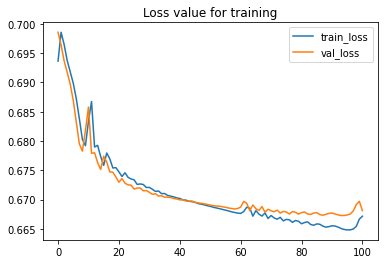

In [ ]:
import matplotlib.pyplot as plt
plt.title('Loss value for training')
plt.plot(losses, label = 'train_loss')
plt.plot(val_losses, label = 'val_loss')
plt.legend()
plt.show()

In [ ]:
with torch.no_grad():

    #model = model.to('cpu')
    y_pred = model(X_val)

    y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
    predicted = np.argmax(y_pred,axis=1)
    accuracy = (accuracy_score(predicted,y_val))
    print(accuracy)

0.5886536597027612


1주차에 배웠던 활성화 함수와 최적화 함수를 사용하려 했으나.. 모델의 성능이 0.49로 이진 분류인 것을 생각하면 매우 낮은 성능을 보였음  
epoch는 학습 양상을 보며 100으로 설정  
> 활성화 함수를 Relu, 최적화 방식을 Adam 알고리즘을 사용했을 때는 0.59정도의 성능을 보임  

한계와 개선할 점 : 명목형 변수가 많아 정확한 예측을 하기 힘든 것 같다. 전처리의 개선이 필요하며 과적합을 막기위한 정규화 또한 개선에 도움을 줄 것 같다.

#### 3주차

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(2021)
if device == 'cuda':
    torch.cuda.manual_seed_all(2021)

In [14]:
x_train_1 = df_onehot.toarray()
x_train = np.concatenate((x_train_1, df_numeric), axis = 1)
y_train = df_train_y.to_numpy()

In [15]:
x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2 ,random_state=2021)

In [17]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

(torch.Size([401560, 228]),
 torch.Size([401560]),
 torch.Size([100391, 228]),
 torch.Size([100391]))

In [21]:
class CustomDataset(Dataset):
  def __init__(self, X, y):
    self.x_data = X
    self.y_data = y

  def __len__(self):

    return len(self.x_data)

  def __getitem__(self, idx):

    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)

    return x,y

In [22]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(228, 300),
        nn.ReLU(),
        nn.Dropout(p = 0.25)
    )
    self.layer2 = nn.Sequential(
          nn.Linear(300, 300), 
        nn.ReLU(),
        nn.Dropout(p = 0.25)
    )
    self.layer3 = nn.Sequential(
          nn.Linear(300, 300), 
        nn.ReLU(),
        nn.Dropout(p = 0.25)
    )
    self.layer4 = nn.Sequential(
        nn.Linear(300, 2),
        nn.Sigmoid()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [34]:
batch_size = 256
nb_epochs = 6

dataset = CustomDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=batch_size)

model = Model().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3) 

In [35]:
losses = []
val_losses = []

for epoch in range(nb_epochs + 1):
  loss_in_epoch = []
  val_loss_in_epoch = []
  print('='*50)
  for batch_idx, samples in enumerate(dataloader):
    x, y = samples
    prediction = model(x)
    cost = loss_fn(prediction, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if batch_idx % 100 == 0:
      val_pred = model(x_val)
      cost2 = loss_fn(val_pred, y_val)
      loss_in_epoch.append(cost.item())
      val_loss_in_epoch.append(cost2.item())
      print('Epoch {:4d}/{}, Batch {}/{} Cost: {:.6f}, Val_cost : {:.6f}'.format(
          epoch, nb_epochs, batch_idx+1, len(dataloader),
          cost.item(), cost2.item()
           ))
  losses.append(np.mean(loss_in_epoch))
  val_losses.append(np.mean(val_loss_in_epoch))


Epoch    0/6, Batch 1/1569 Cost: 0.693410, Val_cost : 0.692976
Epoch    0/6, Batch 101/1569 Cost: 0.660015, Val_cost : 0.668013
Epoch    0/6, Batch 201/1569 Cost: 0.668441, Val_cost : 0.665699
Epoch    0/6, Batch 301/1569 Cost: 0.658469, Val_cost : 0.664532
Epoch    0/6, Batch 401/1569 Cost: 0.671966, Val_cost : 0.664344
Epoch    0/6, Batch 501/1569 Cost: 0.658003, Val_cost : 0.662883
Epoch    0/6, Batch 601/1569 Cost: 0.663885, Val_cost : 0.662624
Epoch    0/6, Batch 701/1569 Cost: 0.674347, Val_cost : 0.662169
Epoch    0/6, Batch 801/1569 Cost: 0.679455, Val_cost : 0.661656
Epoch    0/6, Batch 901/1569 Cost: 0.659543, Val_cost : 0.660843
Epoch    0/6, Batch 1001/1569 Cost: 0.684734, Val_cost : 0.661539
Epoch    0/6, Batch 1101/1569 Cost: 0.668470, Val_cost : 0.661057
Epoch    0/6, Batch 1201/1569 Cost: 0.646851, Val_cost : 0.660273
Epoch    0/6, Batch 1301/1569 Cost: 0.643391, Val_cost : 0.661141
Epoch    0/6, Batch 1401/1569 Cost: 0.649687, Val_cost : 0.659972
Epoch    0/6, Batch 15

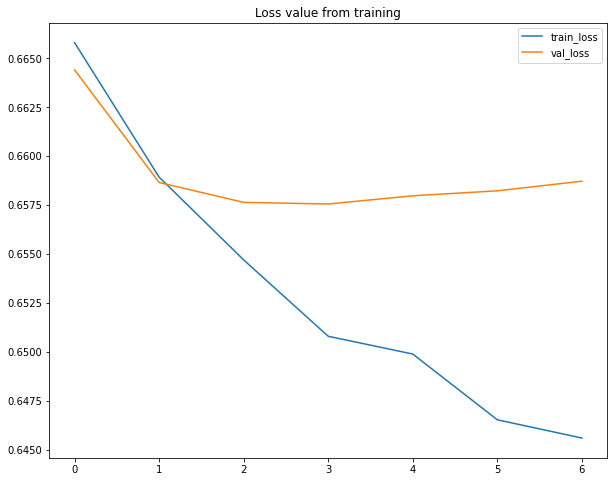

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.title('Loss value from training')
plt.plot(losses, label = 'train_loss')
plt.plot(val_losses, label = 'val_loss')
plt.legend()
plt.show()

In [40]:
with torch.no_grad():

    #model = model.to('cpu')
    y_pred = model(x_val)

    y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
    predicted = np.argmax(y_pred,axis=1)
    accuracy = accuracy_score(predicted,y_val)
    f1 = f1_score(predicted, y_val)
    pred_final = np.where(y_pred[:,1] >= 0.4 , 1, 0)
    f1_ = f1_score(pred_final, y_val)
    print("정확도 : {}\nF1_score : {}\nThreshold 변화 F1_score : {}".format(accuracy, f1, f1_))

정확도 : 0.6057515115896843
F1_score : 0.6022171077096251
Threshold 변화 F1_score : 0.6468348192285291


3주차 내용에서는 2주차 방법에서 모델 클래스, 데이터 로더 등을 새롭게 정의하여 사용  
데이터 로더를 사용하여 배치 사이즈 별로 학습을 진행한 결과 epoch를 적게 해도 학습이 빠른 효과가 있었음. 또한 드롭 아웃 층을 사용해서 과적합 완화    
  
**전처리 방법**  
변수를 모두 사용하지 않았으며 원핫인코딩과 순서가 있는 명목형 변수의 경우 스케일을 맞추기 위해 스케일링  

**조정한 파라미터들**  
1. 퍼셉트론의 개수와 층의 개수 > 변화를 시도했지만 명확한 기준이 없어서 많이 조정하지는 않음  
2. 최적화 알고리즘의 학습률 > 1e-4에서 1e-2정도를 변화시켜가며 학습 진행  
3. 배치 사이즈 -> 학습 데이터가 수십 만개여서 256보다 큰 배치 사이즈로 변화시키며 학습 > 256으로 결정  
4. epoch  

**큰 영향을 준 파라미터 : 학습률, 배치사이즈, epoch**  

성능 향상은 있었지만 크지 않았으며 실제 데이콘에서의 평가 기준인 f1 score는 Threshold를 조정한 결과 0.646의 성능을 보였음!


한계점 : 코랩 램의 한계로 모든 특성을 원핫 인코딩 하면 램이 버티지 못함..  속성이 21개 이상인 범주형 데이터는 뺐기 때문에 애초에 데이터에 상당한 손실이 있는 상태로 학습을 진행 

궁금했던 점 : 미니배치 학습을 실행하면 미니배치마다 그래디언트가 조정되므로 배치 학습을 했을 때보다 그래디언트가 많이 조정되는데 이것이 과적합에 영향이 있을것 같아서 epoch를 작게 했습니다. 실제로도 미니배치 학습을 할 떄 epoch을 작게 하는 것이 맞는지 궁금해요!